In [1]:
#Load necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Production Data Cleaning

In [2]:
data1=pd.read_csv('ProdLaMonta.csv', parse_dates=True, dayfirst=True, index_col='Date') # pandas could not read â and è

In [3]:
data1.head(4)

,ProdCum,ProdDaily,Unnamed: 3,Unnamed: 4
Date,,,,
2018-02-02,1227576,NaN,NaN,02/02/2018
2018-02-03,1254823,27247.0,NaN,03/02/2018
2018-02-04,1275001,20178.0,NaN,04/02/2018
2018-02-05,1291910,16909.0,NaN,05/02/2018


In [4]:
data2=data1.drop(['Unnamed: 3', 'Unnamed: 4'], axis=1)

In [5]:
data2.shape

(801, 2)

In [6]:
data2.isnull().sum()

ProdCum      0
ProdDaily    1
dtype: int64

In [7]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 801 entries, 2018-02-02 to 2020-04-12
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ProdCum    801 non-null    int64  
 1   ProdDaily  800 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 18.8 KB


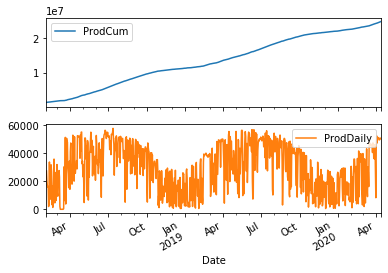

In [8]:
_ =data2.plot(subplots=True)

In [9]:
#apply to datetime for date index column
#data1.index=pd.to_datetime(data1.index, dayfirst=True, ) #utc=True
#data1.info()

#convert ProdCum obj to float
#convert_dict={'ProdCum':float}
#data2=data_raw5.astype(convert_dict)
#data2.info()

In [10]:
#replace zeros with nana
data3=data2.replace(0.0, np.nan)
data3.isnull().sum()

ProdCum      0
ProdDaily    9
dtype: int64

In [11]:
#Filling missing data 
#forward and backward fill
data4=data3.fillna(method='ffill')
data5=data4.fillna(method='bfill')
data5.isnull().sum()
#Smooth with rolling mean
#data3=data2.rolling(30).mean()
#data3.isnull().sum()

ProdCum      0
ProdDaily    0
dtype: int64

In [12]:
data5.index.min(), data4.index.max()

(Timestamp('2018-02-02 00:00:00'), Timestamp('2020-04-12 00:00:00'))

In [13]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 801 entries, 2018-02-02 to 2020-04-12
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ProdCum    801 non-null    int64  
 1   ProdDaily  801 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 18.8 KB


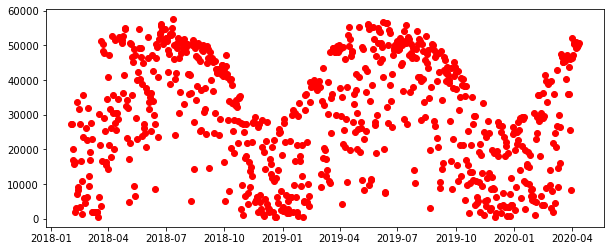

In [14]:
plt.figure(figsize=(10, 4))
plt.figure
_=plt.plot(data5['ProdDaily'], 'ro')

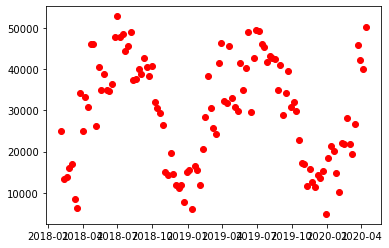

In [15]:
data_w=data5.resample('W').mean()
plt.figure
_=plt.plot(data_w['ProdDaily'], 'ro')

Add additional data: Daily temperature, solar irradiation, humidity, wind

Meteo Data Cleaning

In [16]:
meteo2018=pd.read_csv('export-grenoble-isere2018_m.csv', parse_dates=True, index_col='DATE', dayfirst=True)
meteo2019=pd.read_csv('export-grenoble-isere2019_m.csv', parse_dates=True, index_col='DATE', dayfirst=True)
meteo2020=pd.read_csv('export-grenoble-isere2020_m.csv', parse_dates=True, index_col='DATE', dayfirst=True)

In [17]:
#Date to Time
meteo2018.index=pd.to_datetime(meteo2018.index, format='%Y/%m/%d')
meteo2019.index=pd.to_datetime(meteo2019.index, format='%Y/%m/%d')
meteo2020.index=pd.to_datetime(meteo2020.index, format='%Y/%m/%d')

In [18]:
meteo=meteo2018.append(meteo2019).append(meteo2020)
meteo['2018-02-02':'2020-03-31'].shape

(789, 21)

In [19]:
meteo=meteo.drop('OPINION', axis=1)
meteo.head()

,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR
DATE,,,,,,,,,,,,,,,,,,,,
2018-01-01,2,0,14,0,2,0,12.9,93,7.250,1019,82.375,3,2,-4,119,116,122,0.0,1,5.1
2018-01-02,2,-1,7,-1,1,0,7.7,95,6.000,1023,92.250,2,1,-2,260,122,122,0.0,1,3.3
2018-01-03,5,2,14,5,5,2,11.2,99,3.750,1019,95.875,5,5,0,143,143,248,0.0,1,3.3
2018-01-04,5,4,7,3,5,4,19.9,98,2.375,1016,90.250,5,5,3,248,248,143,0.0,1,5.1
2018-01-05,7,3,9,4,7,3,1.4,96,7.875,1011,56.375,7,6,1,119,116,116,0.0,1,8.7


In [20]:
#Define mean day temperature as (T_morning+T_noon)/2
T_MEAN=(meteo['TEMPERATURE_MORNING_C'] + meteo['TEMPERATURE_NOON_C'])/2
meteo['T_MEAN']=T_MEAN

In [21]:
#drop useless columns
meteo1=meteo.drop(['MAX_TEMPERATURE_C','MIN_TEMPERATURE_C', 'TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C', 'VISIBILITY_AVG_KM', 'WEATHER_CODE_MORNING', 'WEATHER_CODE_NOON','WEATHER_CODE_EVENING'], axis=1)
meteo1.head()

,WINDSPEED_MAX_KMH,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,T_MEAN
DATE,,,,,,,,,,,,
2018-01-01,14,12.9,93,1019,82.375,3,2,-4,0.0,1,5.1,1.0
2018-01-02,7,7.7,95,1023,92.250,2,1,-2,0.0,1,3.3,0.0
2018-01-03,14,11.2,99,1019,95.875,5,5,0,0.0,1,3.3,5.0
2018-01-04,7,19.9,98,1016,90.250,5,5,3,0.0,1,5.1,4.0
2018-01-05,9,1.4,96,1011,56.375,7,6,1,0.0,1,8.7,5.5


In [22]:
meteo2=meteo1.rename(columns={'WINDSPEED_MAX_KMH':'MWS', 'PRECIP_TOTAL_DAY_MM': 'PRECIP', 'HUMIDITY_MAX_PERCENT': 'HUM', 'PRESSURE_MAX_MB': 'PRES', 'CLOUDCOVER_AVG_PERCENT':'CLCOVER', 'HEATINDEX_MAX_C':'HI', 'DEWPOINT_MAX_C':'DEWP', 'WINDTEMP_MAX_C':'WINDT', 'TOTAL_SNOW_MM':'SNOW', 'UV_INDEX': 'UVIND', 'SUNHOUR':'SUNH'})
meteo2.head(2)

,MWS,PRECIP,HUM,PRES,CLCOVER,HI,DEWP,WINDT,SNOW,UVIND,SUNH,T_MEAN
DATE,,,,,,,,,,,,
2018-01-01,14,12.9,93,1019,82.375,3,2,-4,0.0,1,5.1,1.0
2018-01-02,7,7.7,95,1023,92.250,2,1,-2,0.0,1,3.3,0.0


Combine meteo and production data in one dataframe

In [23]:
#define overlapping range of production dataset (data5) and meteo2 dataset
begin_date=max(data5.index.min(), meteo2.index.min())
end_date=min(data5.index.max(), meteo2.index.max())
print('begin date: {}'.format(begin_date))
print('end date: {}'.format(end_date))

begin date: 2018-02-02 00:00:00
end date: 2020-03-31 00:00:00


In [24]:
prod_data=data5.loc['2018-02-02': '2020-03-31']
meteo_data=meteo2.loc['2018-02-02': '2020-03-31']
df=prod_data.join(meteo_data)
df=df.rename(columns={'ProdCum': 'PROD_C', 'ProdDaily':'PROD_D'})
df.head(2)

,PROD_C,PROD_D,MWS,PRECIP,HUM,PRES,CLCOVER,HI,DEWP,WINDT,SNOW,UVIND,SUNH,T_MEAN
Date,,,,,,,,,,,,,,
2018-02-02,1227576,27247.0,14,0.7,93,1010,46.75,0,0,-8,0.5,2,9.9,-3.5
2018-02-03,1254823,27247.0,11,1.2,91,1010,59.25,0,0,-8,1.0,1,9.9,-4.0


In [36]:
#export Datafile
df.to_csv("MontaProdMeteo.csv")